POLYNOMIAL REGRESSION: EXTENDING LINEAR MODELS WITH BASIS FUNCTIONS

- A diferencia de la regresion linear, el modelo aprende a realizar curvas predictorias añadiendo potencias de x

- Esta regresion captura relaciones no lineales sin abandonar la sencillez de la regresion lineal.

- Cuidado con sobre ajustar el modelo de forma que tambien siga el ruido

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

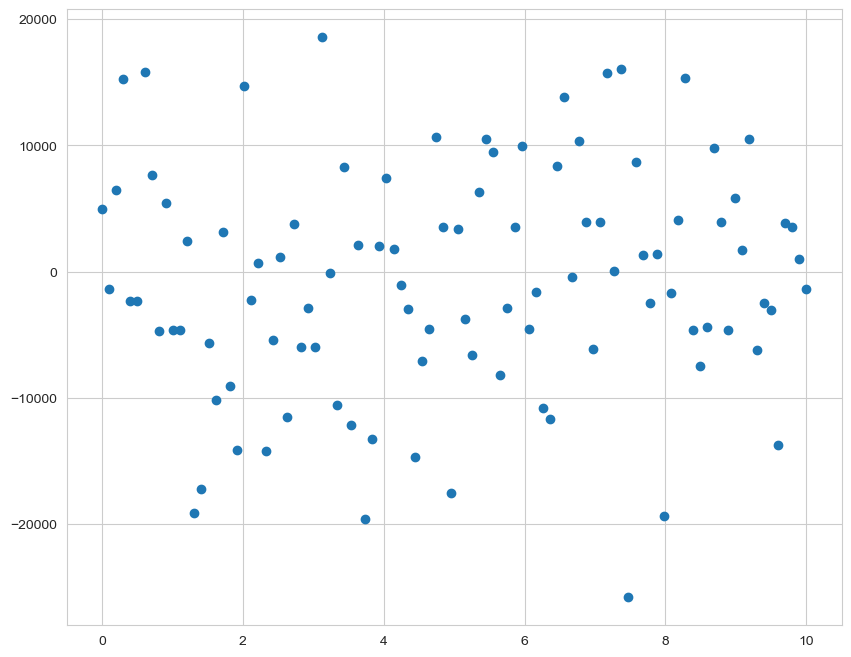

In [3]:
# Fijamos la semilla del generador de numeros aleatorios, de forma que estableciendo esto tendremos siempre los mismos datos
np.random.seed(42)
# Establecemos el numero de puntos que queremos generar (100)
n_samples = 100

x = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = x ** 3 + rng * 100

plt.figure(figsize = (10, 8))
plt.scatter(x, y)

LINEAR REGRESSION

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Coeficiente estimado:  [228.23366306]


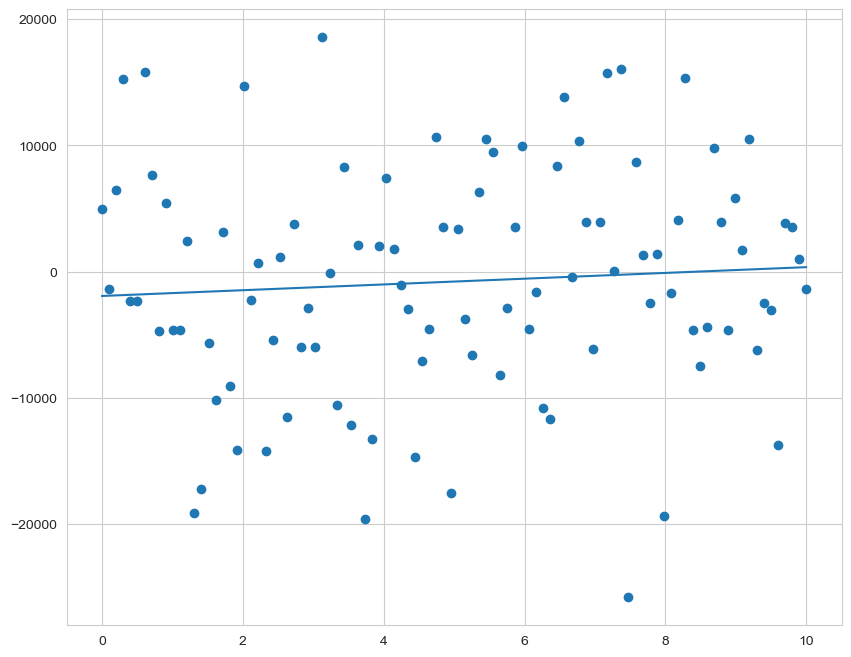

In [5]:
# Creamos y ajustamos el modelo
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
# Tenemos un array, asi que para que sklearn lo interprete bien lo pasamos a matriz
model_pred = lr.predict(x.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.plot(x, model_pred)
print("Coeficiente estimado: ", lr.coef_)

Con la regresion linear, obtenemos una linea recta que intenta ajustarse a los resultados obtenidos, el problema es que la relacion de x e y no es lineal, de forma
que en los extremos la prediccion tiende a aumentar de error, en este caso cuanto mayor en la x mas margen de error se maneja.

Por eso necesitamos un modelo que aprenda con curvas, usamos la regresion polinomica.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# Creamos el modelo polinomico indicado que sera x^2
poly_reg = PolynomialFeatures(degree = 2)
# Creamos una matriz en la que cada fila es [1, x, x^2]
x_poly = poly_reg.fit_transform(x.reshape(-1, 1))

In [8]:
lin_reg_2 = LinearRegression()
# Entrenamos el modelo con los datos modificados, de forma que los coeficientes son los mismos pero la prediccion ahora es una parabola.
lin_reg_2.fit(x_poly, y)
# Generamos la linea (parabola) ajustada a los datos
y_pred = lin_reg_2.predict(x_poly)            

0.01089784164726404


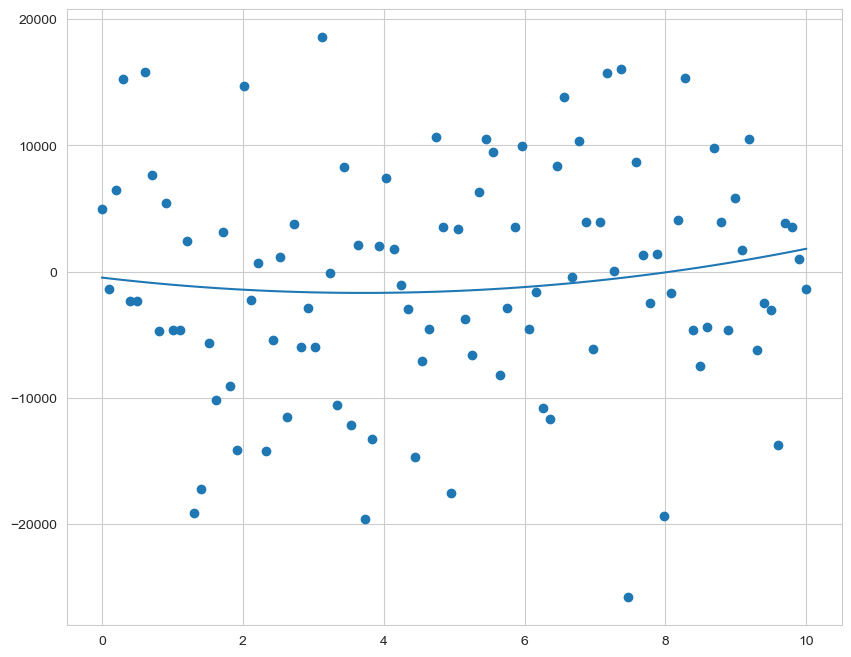

In [9]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.plot(x, y_pred)
# Comprobamos el coeficiente del modelo de regresion polinomica
print(r2_score(y, y_pred))

HACER CON LOS DATOS QUE TENEMOS DE LAS CASAS DE BOSTON, TANTO LA REGRESION LINEAL, LA CUADRATICA Y LA CUBICA

In [10]:
# Cargamos el dataframe con los datos del .data
df_boston = pd.read_csv('data//housing.data', delim_whitespace = True, header = None)
# Ponemos el nombre a las columnas
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# sns.pairplot(df_boston, size = 1.5)

In [11]:
# Establecemos un formato para los numeros float
pd.options.display.float_format = "{:,.2}".format
# Imprimimos la correlacion entre cada par de los diferentes factores
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1.0,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.0,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1.0,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1.0,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1.0,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1.0,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1.0,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1.0,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1.0,0.46,-0.44,0.54,-0.47


In [12]:
# Seleccionamos dos variables
x_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

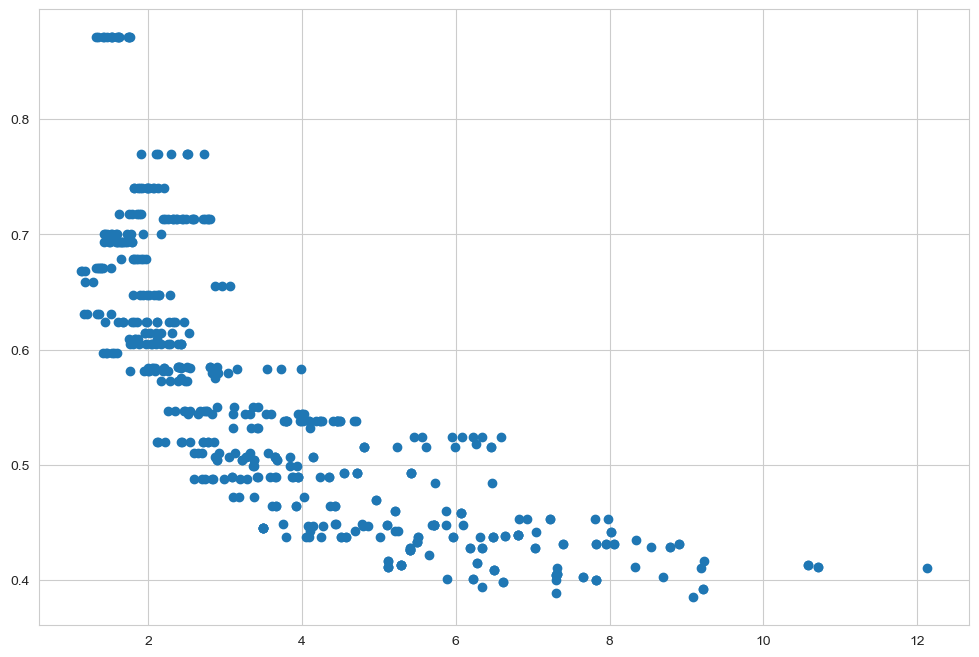

In [13]:
# Imprimimos una figura que muestra la relacion entre las dos variables anteriores
plt.figure(figsize = (12, 8))
plt.scatter(x_boston, y_boston)

MODELO LINEAR DE LA GRAFICA ANTERIOR

R^2 score = 0.59


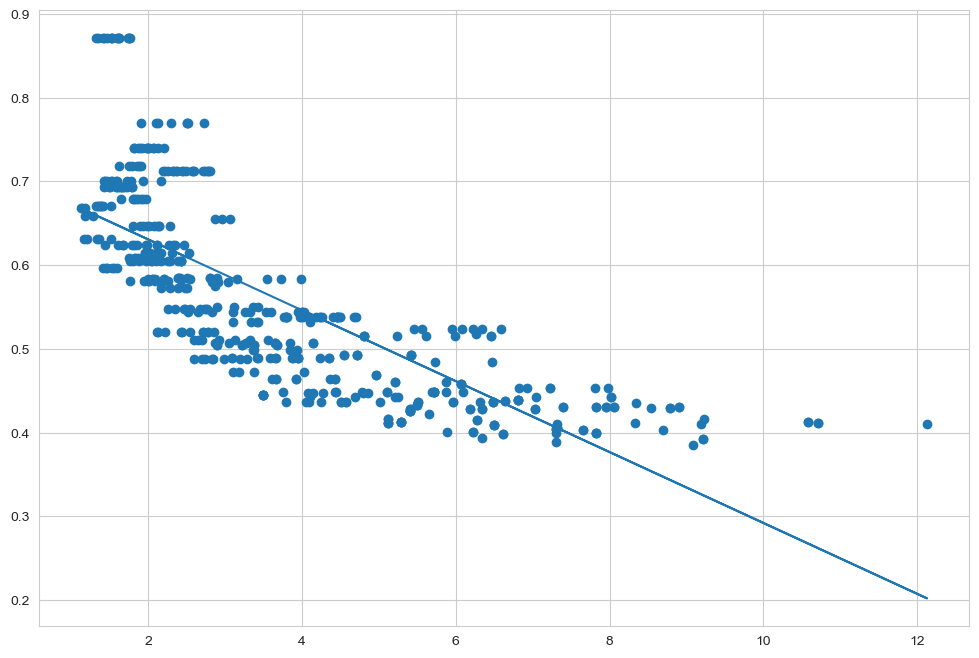

In [21]:
# Creamos y ajustamos el modelo
lr = LinearRegression()
lr.fit(x_boston.reshape(-1, 1), y_boston)
# Tenemos un array, asi que para que sklearn lo interprete bien lo pasamos a matriz
model_pred = lr.predict(x_boston.reshape(-1, 1))

plt.figure(figsize = (12, 8))
plt.scatter(x_boston, y_boston)
plt.plot(x_boston, model_pred)
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

QUADRATIC

In [37]:
# Creamos el modelo polinomico indicado que sera x^2
poly_reg = PolynomialFeatures(degree = 2)
# Creamos una matriz en la que cada fila es [1, x, x^2]
x_poly = poly_reg.fit_transform(x_boston.reshape(-1, 1))

In [42]:
lin_reg_2 = LinearRegression()
# Entrenamos el modelo con los datos modificados, de forma que los coeficientes son los mismos pero la prediccion ahora es una parabola.
lin_reg_2.fit(x_poly, y_boston)
# Extraemos el menor y mayor valor y generamos un array con un salto de 1, desde el valor mas pequeño hasta el mayor excluido
x_fit = np.arange(x_boston.min(), x_boston.max(), 1)[:, np.newaxis]
x_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [44]:
# Generamos la linea (parabola) ajustada a los datos
y_pred = lin_reg_2.predict(poly_reg.fit_transform(x_fit.reshape(-1, 1)))    

R^2 score = 0.70


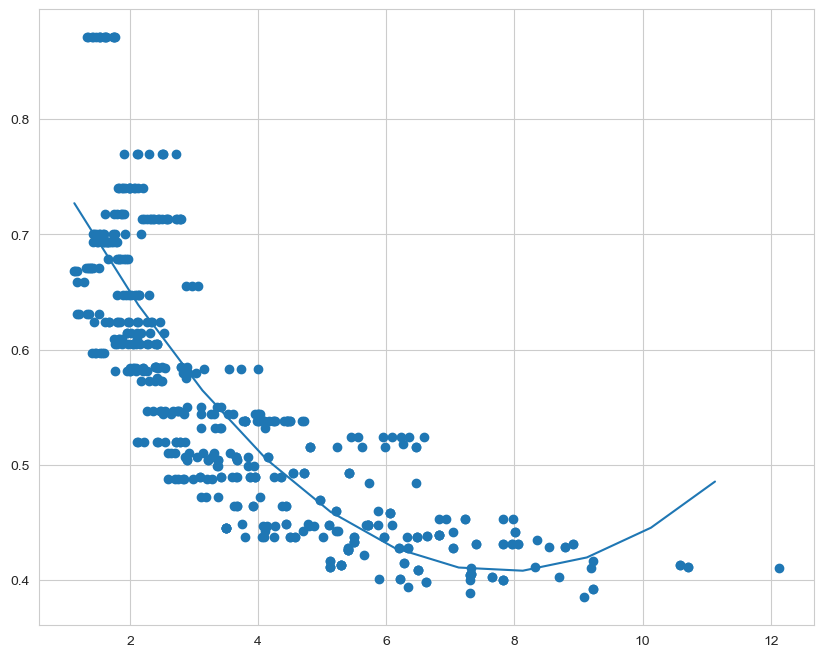

In [48]:
plt.figure(figsize = (10, 8))
plt.scatter(x_boston, y_boston)
plt.plot(x_fit, y_pred)
# Comprobamos el coeficiente del modelo de regresion polinomica
print('R^2 score = {:.2f}'.format(r2_score(y_boston, lin_reg_2.predict(x_poly))))

CUBIC

Exactamente igual que el anterior, solo se cambia el degree del poly_reg

In [61]:
# Creamos el modelo polinomico indicado que sera x^2
poly_reg = PolynomialFeatures(degree = 3)
# Creamos una matriz en la que cada fila es [1, x, x^2]
x_poly = poly_reg.fit_transform(x_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()

In [62]:
# Entrenamos el modelo con los datos modificados, de forma que los coeficientes son los mismos pero la prediccion ahora es una parabola.
lin_reg_3.fit(x_poly, y_boston)
# Extraemos el menor y mayor valor y generamos un array con un salto de 1, desde el valor mas pequeño hasta el mayor excluido
x_fit = np.arange(x_boston.min(), x_boston.max(), 1)[:, np.newaxis]

In [63]:
# Generamos la linea (parabola) ajustada a los datos
y_pred = lin_reg_3.predict(poly_reg.fit_transform(x_fit.reshape(-1, 1)))    

R^2 score = 0.71


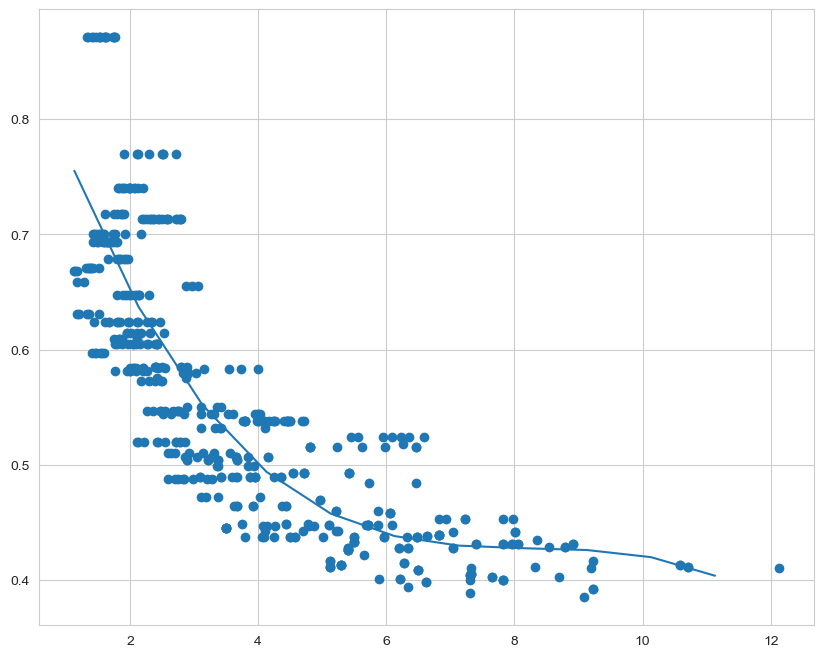

In [64]:
plt.figure(figsize = (10, 8))
plt.scatter(x_boston, y_boston)
plt.plot(x_fit, y_pred)
# Comprobamos el coeficiente del modelo de regresion polinomica
print('R^2 score = {:.2f}'.format(r2_score(y_boston, lin_reg_3.predict(x_poly))))